# Exploratory Data Analysis

### Goals: 
- Understand key patterns.
- Spot relationships for feature engineering.
- Explore potential trends, including short- and long-term patterns.
- Generate additional variables that might be useful for analysis, such as 
monthly price volatility.

### Steps:

## Setup
### Required Packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.seasonal import STL

### Import Data from Parquet

In [11]:
data = pd.read_parquet("./../data/02_silver/oil_and_gas_dataset-focused_columns.parquet")
data

bandeira_revenda_cat sigla_uf id_municipio   produto  \
0               White Label       BA      2917607  Gasolina   
1               White Label       PB      2507507    Diesel   
2               White Label       AL      2707701    Etanol   
3               White Label       PE      2603405    Diesel   
4               Green Label       PE      2613909    Etanol   
...                     ...      ...          ...       ...   
556496         Purple Label       SP      3530706    Etanol   
556497         Purple Label       SP      3513009  Gasolina   
556498          White Label       MG      3119401    Diesel   
556499           Blue Label       GO      5205109    Etanol   
556500          White Label       PB      2503209    Etanol   

        n_estabelecimentos  avg_preco_compra  avg_preco_venda       data  \
0                        5          1.723251         2.030526 2004-05-01   
1                       59          1.197337         1.328465 2004-05-01   
2                        2          0.776383         1.089750 2004-05-01   
3                        1          1.107405         1.300000 2004-05-01   
4                        4          0.877773         1.316875 2004-05-01   
...                    ...               ...              ...        ...   
556496                   1          3.516582         4.040000 2024-08-01   
556497                   3          5.201834         5.956667 2024-08-01   
556498                   5          5.120835         5.864545 2024-08-01   
556499                   3          3.490204         4.010000 2024-08-01   
556500                   4          4.144155         4.753750 2024-08-01   

        winsor_preco_compra  log_n_estabelecimentos faixa_estabelecimentos  
0                  1.760000                1.791759                   4–10  
1                  1.235000                4.094345                 51–200  
2                  0.803920                1.098612                    1–3  
3                  1.235000                0.693147                    1–3  
4                  0.877773                1.609438                   4–10  
...                     ...                     ...                    ...  
556496             3.516582                0.693147                    1–3  
556497             5.201834                1.386294                    1–3  
556498             5.120835                1.791759                   4–10  
556499             3.490204                1.386294                    1–3  
556500             4.144155                1.609438                   4–10  

[556501 rows x 11 columns]

## Map `sigla_uf` to `regiao`, to analyze the contribution of regions

In [12]:
# --- Add region based on sigla_uf ---
uf_to_region = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}
data['regiao'] = data['sigla_uf'].map(uf_to_region)

# --- Summary Statistics ---
display(data.describe(include='all'))

bandeira_revenda_cat sigla_uf id_municipio   produto  \
count                556501   556501       556501    556501   
unique                    4       27          690         3   
top             White Label       SP      3304557  Gasolina   
freq                 188545   140240         1525    194711   
mean                    NaN      NaN          NaN       NaN   
min                     NaN      NaN          NaN       NaN   
25%                     NaN      NaN          NaN       NaN   
50%                     NaN      NaN          NaN       NaN   
75%                     NaN      NaN          NaN       NaN   
max                     NaN      NaN          NaN       NaN   
std                     NaN      NaN          NaN       NaN   

        n_estabelecimentos  avg_preco_compra  avg_preco_venda  \
count        556501.000000     556501.000000    556501.000000   
unique                 NaN               NaN              NaN   
top                    NaN               NaN              NaN   
freq                   NaN               NaN              NaN   
mean              6.343187          2.840038         3.270554   
min               1.000000          0.413200         0.668744   
25%               2.000000          1.915800         2.205714   
50%               3.000000          2.489239         2.894286   
75%               6.000000          3.465400         3.967500   
max            1096.000000          7.868928         8.990000   
std              15.529743          1.225746         1.390611   

                                 data  winsor_preco_compra  \
count                          556501        556501.000000   
unique                            NaN                  NaN   
top                               NaN                  NaN   
freq                              NaN                  NaN   
mean    2015-04-05 23:16:10.432758016             2.837783   
min               2004-05-01 00:00:00             0.803920   
25%               2010-07-01 00:00:00             1.915800   
50%               2015-07-01 00:00:00             2.489239   
75%               2020-03-01 00:00:00             3.465400   
max               2024-08-01 00:00:00             6.452584   
std                               NaN             1.216868   

        log_n_estabelecimentos faixa_estabelecimentos   regiao  
count            556501.000000                 556501   556501  
unique                     NaN                      5        5  
top                        NaN                    1–3  Sudeste  
freq                       NaN                 297130   268827  
mean                  1.564762                    NaN      NaN  
min                   0.693147                    NaN      NaN  
25%                   1.098612                    NaN      NaN  
50%                   1.386294                    NaN      NaN  
75%                   1.945910                    NaN      NaN  
max                   7.000334                    NaN      NaN  
std                   0.783839                    NaN      NaN

## Add seasonality with sin/cos

In [13]:
# --- Extract month number and encode seasonality with sin/cos ---
data['month_num'] = data['data'].dt.month
# Normalize month to radians (1–12 → 0 to 2π)
data['month_sin'] = np.sin(2 * np.pi * data['month_num'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month_num'] / 12)
display(data.describe(include='all'))

bandeira_revenda_cat sigla_uf id_municipio   produto  \
count                556501   556501       556501    556501   
unique                    4       27          690         3   
top             White Label       SP      3304557  Gasolina   
freq                 188545   140240         1525    194711   
mean                    NaN      NaN          NaN       NaN   
min                     NaN      NaN          NaN       NaN   
25%                     NaN      NaN          NaN       NaN   
50%                     NaN      NaN          NaN       NaN   
75%                     NaN      NaN          NaN       NaN   
max                     NaN      NaN          NaN       NaN   
std                     NaN      NaN          NaN       NaN   

        n_estabelecimentos  avg_preco_compra  avg_preco_venda  \
count        556501.000000     556501.000000    556501.000000   
unique                 NaN               NaN              NaN   
top                    NaN               NaN              NaN   
freq                   NaN               NaN              NaN   
mean              6.343187          2.840038         3.270554   
min               1.000000          0.413200         0.668744   
25%               2.000000          1.915800         2.205714   
50%               3.000000          2.489239         2.894286   
75%               6.000000          3.465400         3.967500   
max            1096.000000          7.868928         8.990000   
std              15.529743          1.225746         1.390611   

                                 data  winsor_preco_compra  \
count                          556501        556501.000000   
unique                            NaN                  NaN   
top                               NaN                  NaN   
freq                              NaN                  NaN   
mean    2015-04-05 23:16:10.432758016             2.837783   
min               2004-05-01 00:00:00             0.803920   
25%               2010-07-01 00:00:00             1.915800   
50%               2015-07-01 00:00:00             2.489239   
75%               2020-03-01 00:00:00             3.465400   
max               2024-08-01 00:00:00             6.452584   
std                               NaN             1.216868   

        log_n_estabelecimentos faixa_estabelecimentos   regiao      month_num  \
count            556501.000000                 556501   556501  556501.000000   
unique                     NaN                      5        5            NaN   
top                        NaN                    1–3  Sudeste            NaN   
freq                       NaN                 297130   268827            NaN   
mean                  1.564762                    NaN      NaN       5.764592   
min                   0.693147                    NaN      NaN       1.000000   
25%                   1.098612                    NaN      NaN       3.000000   
50%                   1.386294                    NaN      NaN       6.000000   
75%                   1.945910                    NaN      NaN       8.000000   
max                   7.000334                    NaN      NaN      12.000000   
std                   0.783839                    NaN      NaN       3.353907   

           month_sin     month_cos  
count   5.565010e+05  5.565010e+05  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    1.429001e-02 -5.793651e-02  
min    -1.000000e+00 -1.000000e+00  
25%    -5.000000e-01 -8.660254e-01  
50%     1.224647e-16 -1.836970e-16  
75%     5.000000e-01  8.660254e-01  
max     1.000000e+00  1.000000e+00  
std     6.848661e-01  7.262227e-01

## Analysis of `avg_preco_venda`
We would like to analyze here:
- the distribution of Selling Price;
- the prices per product over the time and the trends;
- The trends per region;
- Year, Season trends.

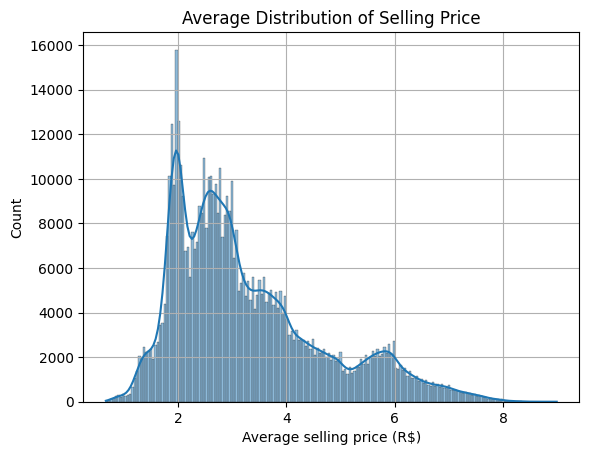

In [14]:
sns.histplot(data['avg_preco_venda'], kde=True)
plt.title("Average Distribution of Selling Price")
plt.xlabel("Average selling price (R$)")
plt.grid(True)
plt.show()

In [15]:
# --- Monthly Trends by Product ---
data['month'] = data['data'].dt.to_period('M').dt.to_timestamp()
data_grouped = data.groupby(['month', 'produto'])['avg_preco_venda'].mean().reset_index()
fig = px.line(data_grouped, x='month', y='avg_preco_venda', color='produto',
              title="Monthly Trend of Average Selling Price by Product")
fig.show()

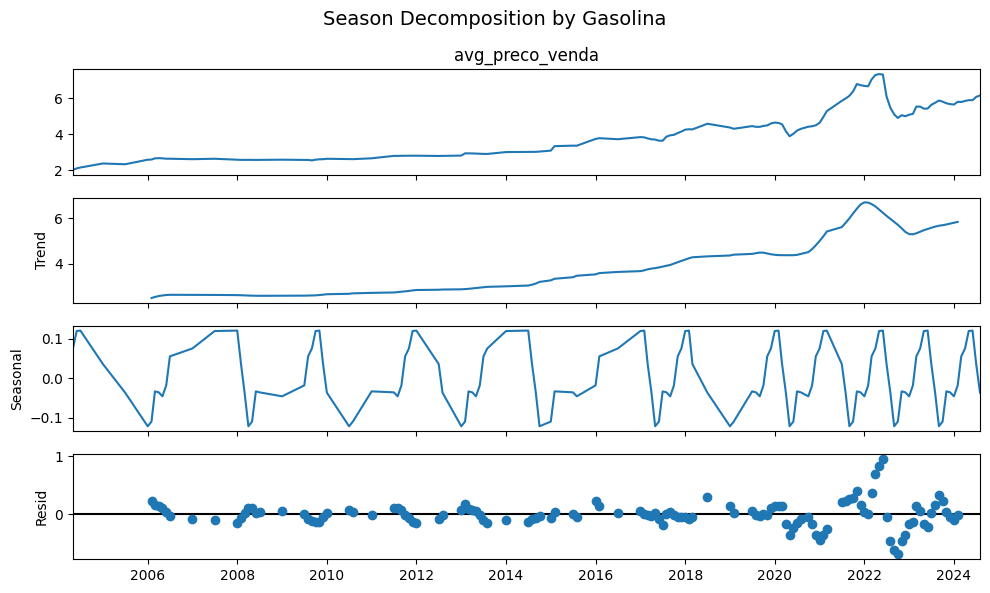

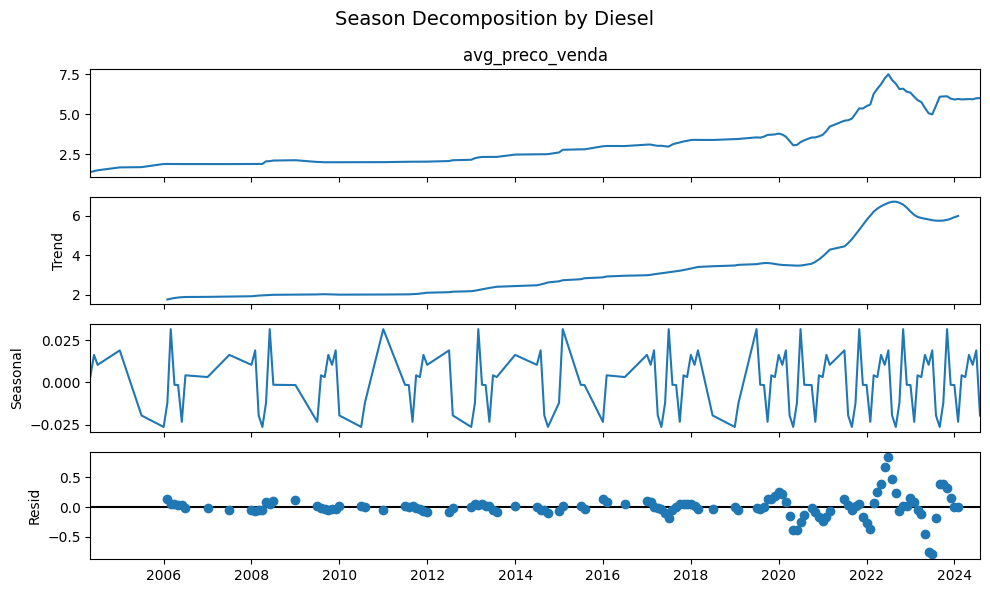

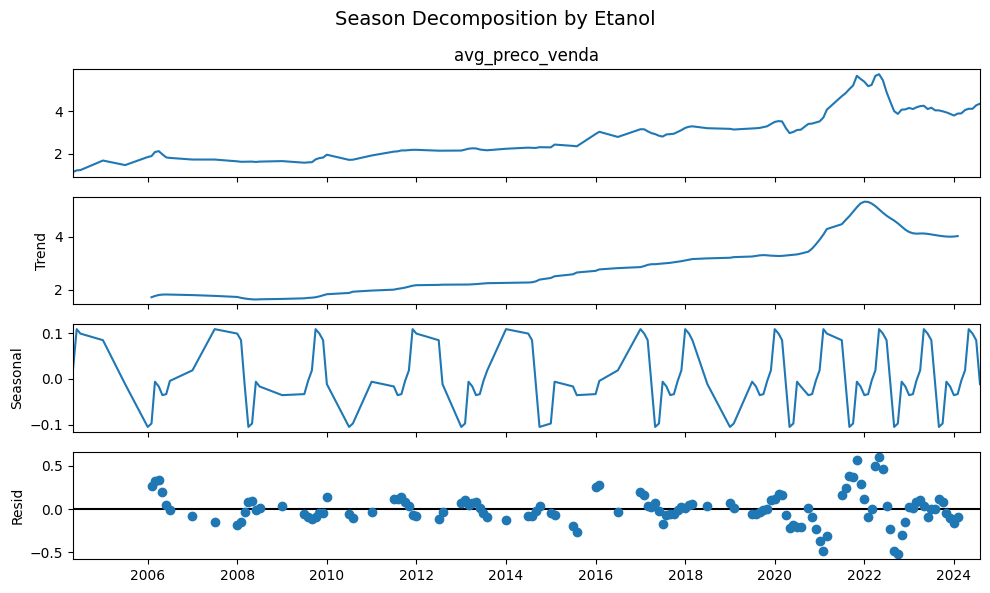

In [16]:
# --- Seasonal Decomposition by Produto ---
for product in data['produto'].unique():
    ts = data[data['produto'] == product].groupby('month')['avg_preco_venda'].mean()
    ts = ts.asfreq('MS')
    ts = ts.dropna()  # Drop missing values to avoid ValueError

    result = sm.tsa.seasonal_decompose(ts, model='additive', period=12)
    fig = result.plot()
    fig.set_size_inches(10, 6)
    fig.suptitle(f"Season Decomposition by {product}", fontsize=14)
    plt.tight_layout()
    plt.show()

### **Gasolina**
- **Observed:**
    - A long upward trend from 2016 to 2022.
    - Sharp spikes during 2021-2022 (possibilities: inflation, pandemic recovery, oil market disruptions).
    - Some visible repeating fluctuation - possible seasonal efects.
- **Trend:** The long-term smoothed evolution of prices, with short-term seasonal and residual noise removed.
    - Very stable until 2015.
    - An stable rise after 2016, peaking around mid of 2022.
    - A slight drop or plateau after the peak (possibilities: governement policy or market stabilization).
    - <span style="color:red">*Prices are really changing over time*</span>.
- **Seasonal:** It shows the reaping monthly patterns (seasonality) consistent year over year.
    - Clear cyclic ups and downs accross the year.
    - Regular peaks and troughs <span style="color:red">suggest monthly demand/supply cycles</span>.
    - Amplitude: around +/- 0.1 -> <span style="color:red">modest seasonal effect.</span>. Add sin/cos.
- **Residual:** It is the noise.
    - Stable until around 2020.
    - Bigger spikes in 2021-2022 -> <span style="color:red">unexpected shocks or anomalies (COVID, elections, crisis)</span>.
    - <span style="color:green">Those points are great candidates for anomaly or changepoint detection.</span>.

### **Diesel**
- **Observed:**
    - Strong increase in Diesel prices starting around 2017, peaking in 2022, followed by slight stabilization.
    - Clear signs of long-term upward trend and some short-term fluctuations.
- **Trend:** The long-term smoothed evolution of prices, with short-term seasonal and residual noise removed.
    - Very stable prices from 2005 to ~2016.
    - Sharp, consistent increase after 2017.
    - Noticeable peak in 2022, similar to Gasolina.
- **Seasonal:** It shows the reaping monthly patterns (seasonality) consistent year over year.
    - Almost flat (+/-0.025) -> <span style="color:red">suggests very weak or no seasonal pattern</span>.
- **Residual:** It is the noise.
    - Low and stable until 2020.
    - Large unexpected deviations in 2021-2022 - possible related to external shocks like:
        - War in Ukraine
        - Brazilian election

### **Etanol**
- **Observed:**
    - Overall increasing price trend similar to Gasolina, but with more fluctuations.
    - The peak around 2022 aligns with the post-pandemic and global energy market changes.
- **Trend:** The long-term smoothed evolution of prices, with short-term seasonal and residual noise removed.
    - Smooth and consistent upward trend from ~2015.
    - Like Gasolina, the trend component is very clear and will be crucial in forecasting.
- **Seasonal:** It shows the reaping monthly patterns (seasonality) consistent year over year.
    - Etanol shows <span style="color:red">strong and regular seasonal pattern</span>.
    - Peaks and troughs recur in consistent intervals (~24 months) until 2019, then starts to recur in every ~12 months.
    - The amplitude (+/=0.1 is significant).
    - This makes sense since the Etanol is linked to **sugarcane harvests**, which is related to **regional climate** and **seasonal demand cycles**.
    - <span style="color:green">It would maybe be good to analyze the same trends per region.</span>.
- **Residual:** It is the noise.
    - Low and stable until 2020.
    - Increased volatility post 2020 (same as other fuels) linked to pandemic/economic shifts.

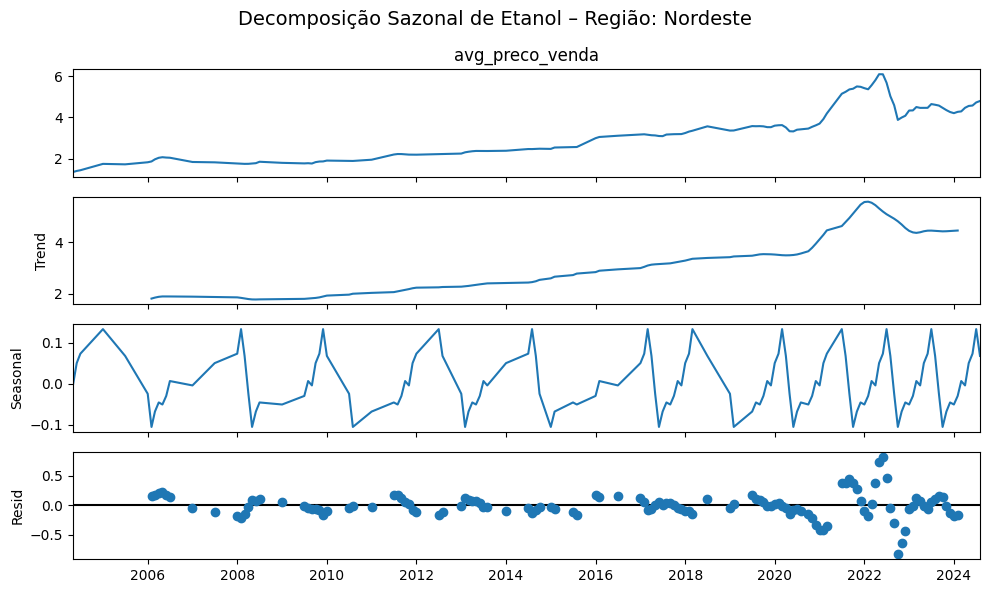

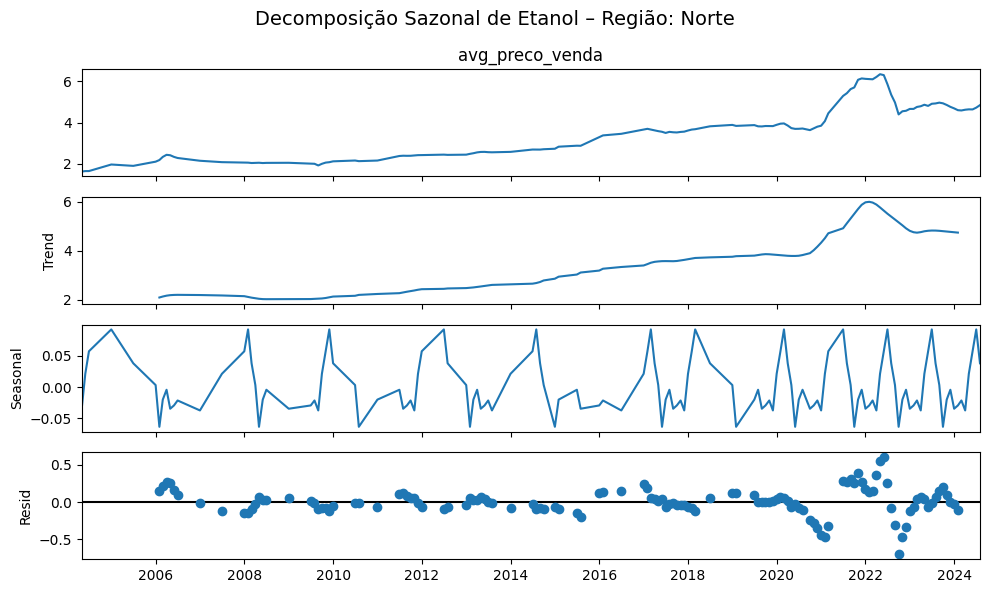

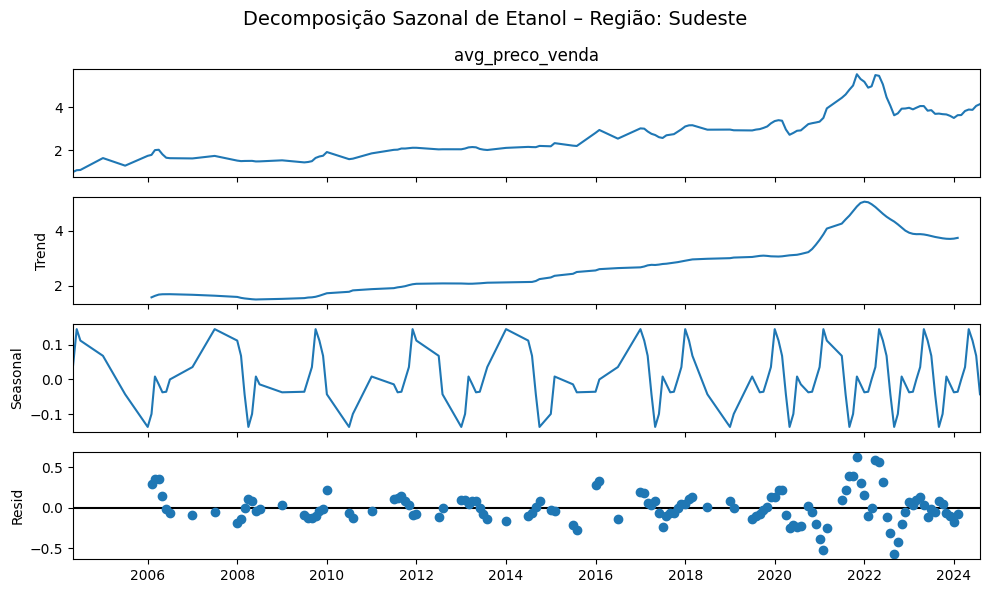

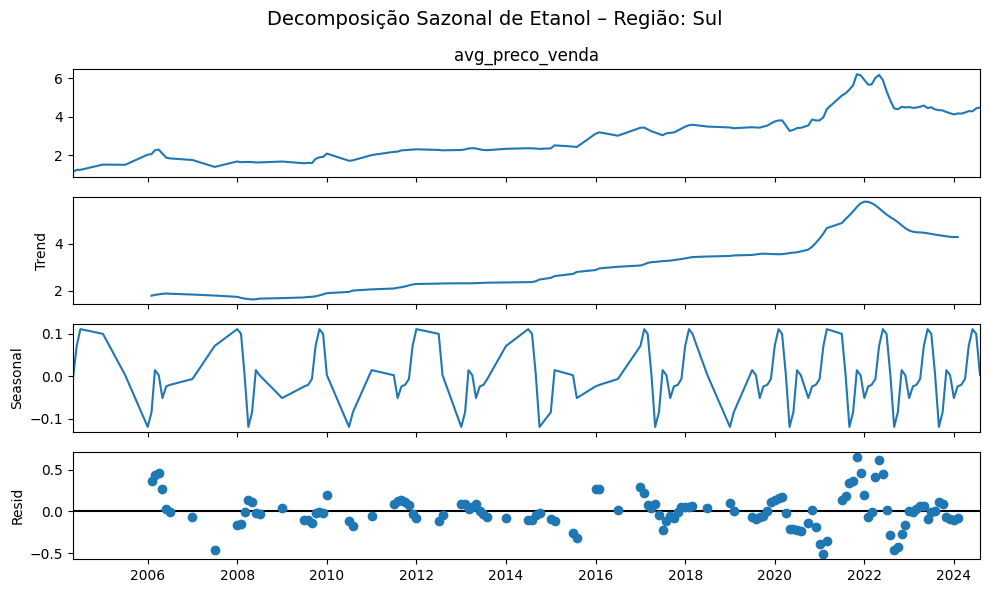

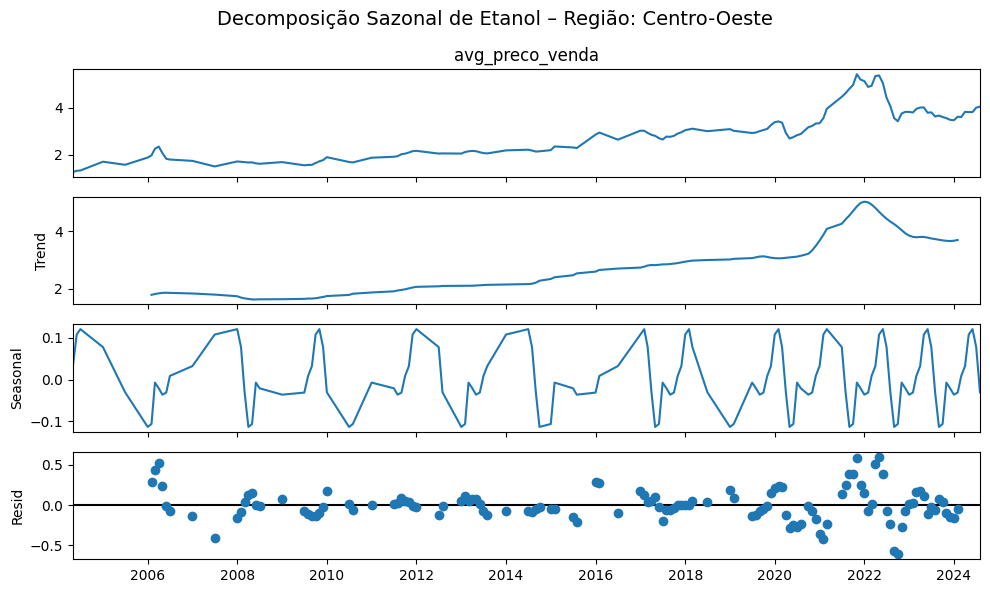

In [17]:
# --- Seasonal Decomposition for Etanol by Region ---
# Additional Insight: Etanol is highly linked to sugarcane, which is regionally concentrated.
# Decompose Etanol price series separately for each region to detect regional seasonality patterns.

for region in data['regiao'].dropna().unique():
    ts_region = data[(data['produto'] == 'Etanol') & (data['regiao'] == region)].groupby('month')['avg_preco_venda'].mean()
    ts_region = ts_region.asfreq('MS').dropna()
    if len(ts_region) > 24:  # ensure enough data points
        result_region = sm.tsa.seasonal_decompose(ts_region, model='additive', period=12)
        fig = result_region.plot()
        fig.set_size_inches(10, 6)
        fig.suptitle(f"Decomposição Sazonal de Etanol – Região: {region}", fontsize=14)
        plt.tight_layout()
        plt.show()


In [18]:
seasonality_strength = []

for region in data['regiao'].dropna().unique():
    ts = data[(data['produto'] == 'Etanol') & (data['regiao'] == region)] \
        .groupby('month')['avg_preco_venda'].mean().asfreq('MS').dropna()
    
    if len(ts) >= 24:
        stl = STL(ts, period=12, robust=True)
        result = stl.fit()
        
        # Cálculo do índice de força sazonal
        var_seasonal = np.var(result.seasonal)
        var_total = np.var(ts)
        strength = var_seasonal / var_total
        
        seasonality_strength.append({
            'regiao': region,
            'sazonalidade_strength': round(strength, 4)
        })

# Mostra resultado
seasonality_data = pd.DataFrame(seasonality_strength).sort_values


In [19]:
seasonality_data

<bound method DataFrame.sort_values of          regiao  sazonalidade_strength
0      Nordeste                 0.0076
1         Norte                 0.0062
2       Sudeste                 0.0187
3           Sul                 0.0117
4  Centro-Oeste                 0.0294>

 ### Seasonality Strengh (by product and by region)

In [20]:
sazonalidade_tendencia = []

for produto in data['produto'].unique():
    for regiao in data['regiao'].dropna().unique():
        ts = data[(data['produto'] == produto) & (data['regiao'] == regiao)] \
            .groupby('month')['avg_preco_venda'].mean().asfreq('MS').dropna()

        if len(ts) >= 24:
            stl = STL(ts, period=12, robust=True)
            result = stl.fit()

            var_total = np.var(ts)
            var_seasonal = np.var(result.seasonal)
            var_trend = np.var(result.trend)

            sazonalidade_tendencia.append({
                'produto': produto,
                'regiao': regiao,
                'forca_sazonalidade': round(var_seasonal / var_total, 4),
                'forca_tendencia': round(var_trend / var_total, 4)
            })

data_sazonal = pd.DataFrame(sazonalidade_tendencia)
display(data_sazonal.sort_values(by='forca_sazonalidade', ascending=False))


produto        regiao  forca_sazonalidade  forca_tendencia
14    Etanol  Centro-Oeste              0.0294           0.6329
12    Etanol       Sudeste              0.0187           0.6629
4   Gasolina  Centro-Oeste              0.0156           0.8779
3   Gasolina           Sul              0.0145           0.8894
2   Gasolina       Sudeste              0.0140           0.8862
1   Gasolina         Norte              0.0132           0.9127
0   Gasolina      Nordeste              0.0121           0.9228
13    Etanol           Sul              0.0117           0.8392
10    Etanol      Nordeste              0.0076           0.7295
11    Etanol         Norte              0.0062           0.8575
9     Diesel  Centro-Oeste              0.0044           0.8978
5     Diesel      Nordeste              0.0043           0.9289
6     Diesel         Norte              0.0040           0.8971
8     Diesel           Sul              0.0019           0.9390
7     Diesel       Sudeste              0.0018           0.9385

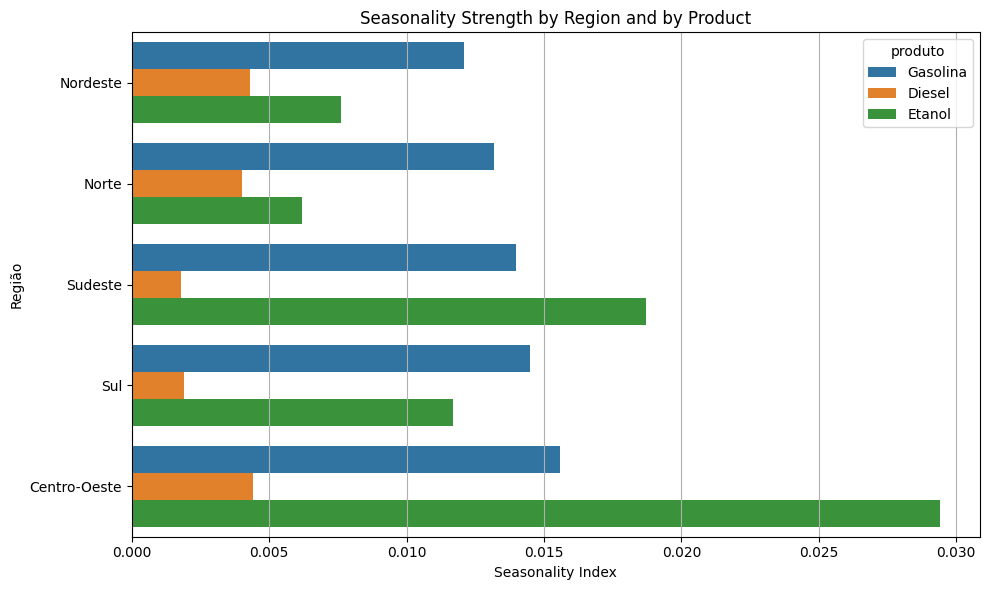

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_sazonal, x='forca_sazonalidade', y='regiao', hue='produto')
plt.title('Seasonality Strength by Region and by Product')
plt.xlabel('Seasonality Index')
plt.ylabel('Região')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


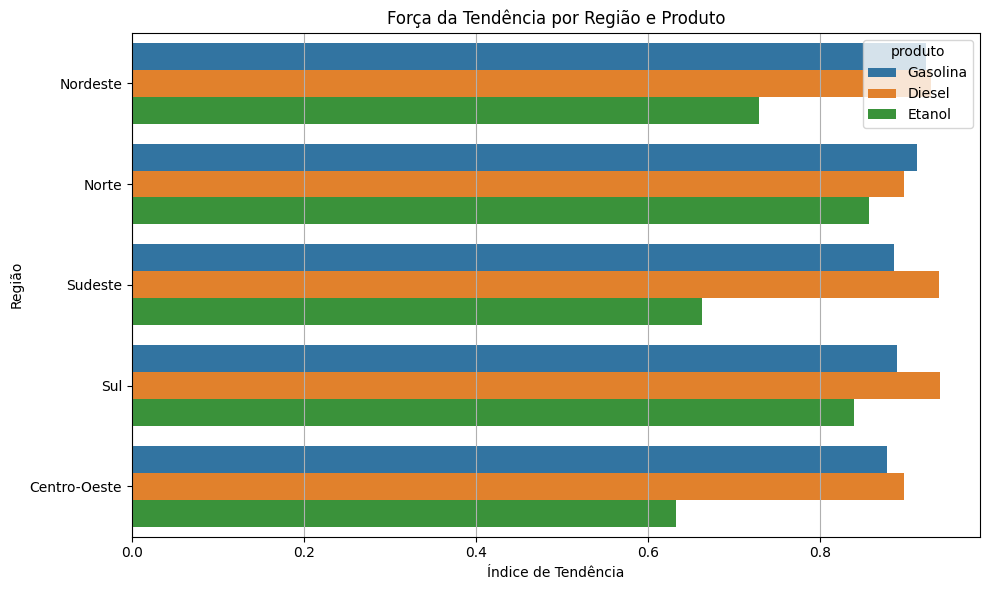

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_sazonal, x='forca_tendencia', y='regiao', hue='produto')
plt.title('Força da Tendência por Região e Produto')
plt.xlabel('Índice de Tendência')
plt.ylabel('Região')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

An STL of ~0.03 is weak, and does not justify the application of region seasonality to predict the prices. 

##  Final test of seasonality
### Use Light GBM to see the gain of each feature, and see if it makes sense to keep the seasonality effect in the overall price analysis.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Ensure proper sorting
df = data.sort_values(['produto', 'data'])

# Create lagged features (you can add more lags if needed)
for lag in [1, 2, 3]:
    df[f'lag_venda_{lag}'] = df.groupby('produto')['avg_preco_venda'].shift(lag)
    df[f'lag_compra_{lag}'] = df.groupby('produto')['avg_preco_compra'].shift(lag)

# Subset com variáveis necessárias
features = ['regiao', 'produto', 'month_sin', 'month_cos'] + [col for col in df.columns if col.startswith('lag_')]
target = 'avg_preco_venda'

# One-hot encode regiao e produto
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Treinamento e avaliação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Importância de features (LightGBM)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("📊 Top 10 variáveis mais importantes:")
display(importances.head(10))


c:\Users\ewotjul\OneDrive - Ericsson\Desktop\Bain\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\ewotjul\OneDrive - Ericsson\Desktop\Bain\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 445200, number of used features: 14
[LightGBM] [Info] Start training from score 2.920457
📊 Top 10 variáveis mais importantes:


lag_venda_1       396
lag_compra_1      320
lag_venda_3       286
lag_compra_3      269
lag_venda_2       259
produto_Etanol    248
lag_compra_2      208
regiao_Norte      199
regiao_Sudeste    182
month_cos         181
dtype: int32

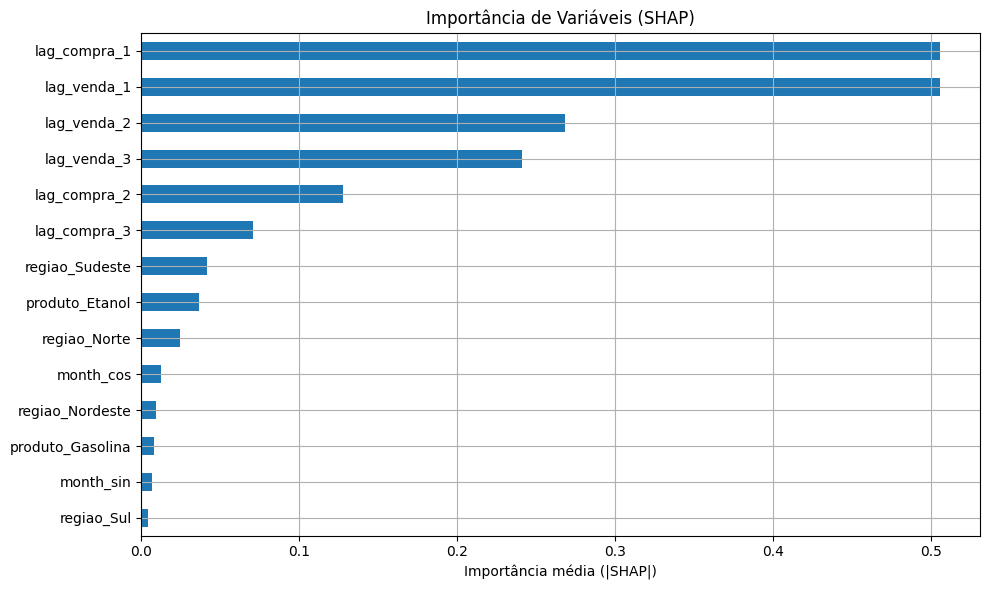

In [24]:
import shap

# Use TreeExplainer diretamente
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Se você tiver uma task de regressão, shap_values será um array [n amostras, n features]
import numpy as np
shap_mean = np.abs(shap_values).mean(axis=0)
shap_importance = pd.Series(shap_mean, index=X_test.columns).sort_values(ascending=False)

# Exibir principais variáveis
shap_importance.head(15).plot(kind='barh', figsize=(10, 6), title='Importância de Variáveis (SHAP)')
plt.gca().invert_yaxis()
plt.xlabel("Importância média (|SHAP|)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Just for Etanol

In [25]:
# Ensure proper sorting
df = data.query('produto=="Etanol"').sort_values(['produto', 'data'])

# Create lagged features (you can add more lags if needed)
for lag in [1, 2, 3]:
    df[f'lag_venda_{lag}'] = df.groupby('produto')['avg_preco_venda'].shift(lag)
    df[f'lag_compra_{lag}'] = df.groupby('produto')['avg_preco_compra'].shift(lag)

# Subset com variáveis necessárias
features = ['regiao', 'produto', 'month_sin', 'month_cos'] + [col for col in df.columns if col.startswith('lag_')]
target = 'avg_preco_venda'

# One-hot encode regiao e produto
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Treinamento e avaliação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Importância de features (LightGBM)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("📊 Top 10 variáveis mais importantes:")
display(importances.head(10))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 148728, number of used features: 12
[LightGBM] [Info] Start training from score 2.387338
📊 Top 10 variáveis mais importantes:


lag_compra_1      413
lag_venda_1       411
lag_compra_3      350
lag_compra_2      301
lag_venda_3       280
lag_venda_2       252
month_cos         197
month_sin         192
regiao_Sudeste    187
regiao_Norte      171
dtype: int32

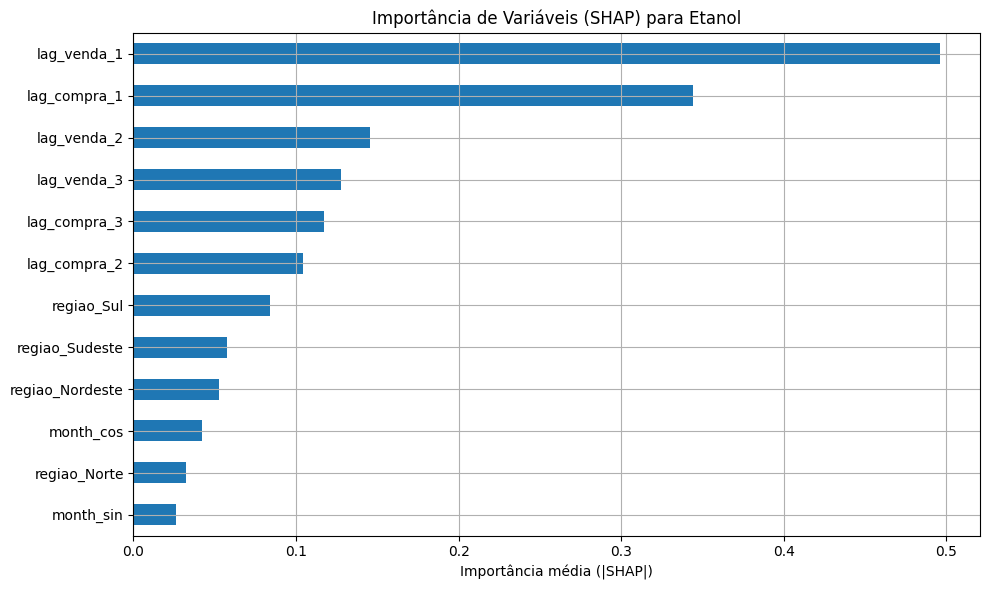

In [26]:
# Use TreeExplainer diretamente
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Se você tiver uma task de regressão, shap_values será um array [n amostras, n features]
import numpy as np
shap_mean = np.abs(shap_values).mean(axis=0)
shap_importance = pd.Series(shap_mean, index=X_test.columns).sort_values(ascending=False)

# Exibir principais variáveis
shap_importance.head(15).plot(kind='barh', figsize=(10, 6), title='Importância de Variáveis (SHAP) para Etanol')
plt.gca().invert_yaxis()
plt.xlabel("Importância média (|SHAP|)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Just for Gasolina

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 155768, number of used features: 12
[LightGBM] [Info] Start training from score 3.271333
📊 Top 10 variáveis mais importantes:


lag_compra_1      482
lag_compra_3      390
lag_compra_2      359
lag_venda_1       315
lag_venda_3       266
month_sin         252
lag_venda_2       236
regiao_Norte      200
month_cos         198
regiao_Sudeste    130
dtype: int32

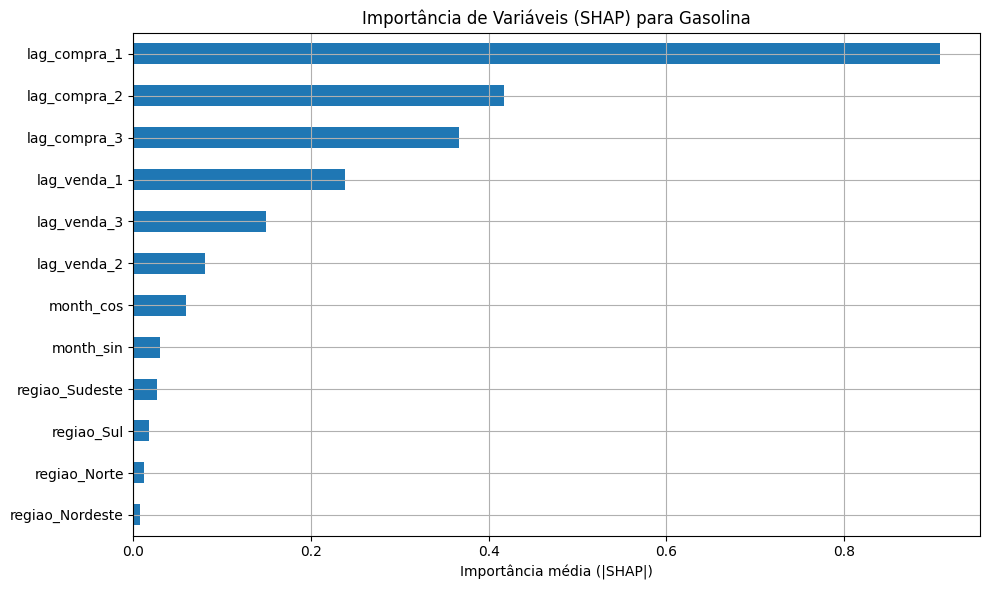

In [27]:
# Ensure proper sorting
df = data.query('produto=="Gasolina"').sort_values(['produto', 'data'])

# Create lagged features (you can add more lags if needed)
for lag in [1, 2, 3]:
    df[f'lag_venda_{lag}'] = df.groupby('produto')['avg_preco_venda'].shift(lag)
    df[f'lag_compra_{lag}'] = df.groupby('produto')['avg_preco_compra'].shift(lag)

# Subset com variáveis necessárias
features = ['regiao', 'produto', 'month_sin', 'month_cos'] + [col for col in df.columns if col.startswith('lag_')]
target = 'avg_preco_venda'

# One-hot encode regiao e produto
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Treinamento e avaliação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Importância de features (LightGBM)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("📊 Top 10 variáveis mais importantes:")
display(importances.head(10))

# Use TreeExplainer diretamente
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Se você tiver uma task de regressão, shap_values será um array [n amostras, n features]
import numpy as np
shap_mean = np.abs(shap_values).mean(axis=0)
shap_importance = pd.Series(shap_mean, index=X_test.columns).sort_values(ascending=False)

# Exibir principais variáveis
shap_importance.head(15).plot(kind='barh', figsize=(10, 6), title='Importância de Variáveis (SHAP) para Gasolina')
plt.gca().invert_yaxis()
plt.xlabel("Importância média (|SHAP|)")
plt.grid(True)
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 140704, number of used features: 12
[LightGBM] [Info] Start training from score 2.498827
📊 Top 10 variáveis mais importantes:


lag_compra_1    371
lag_venda_1     329
lag_venda_3     325
lag_venda_2     317
lag_compra_3    316
lag_compra_2    303
month_sin       219
regiao_Norte    214
month_cos       187
regiao_Sul      175
dtype: int32

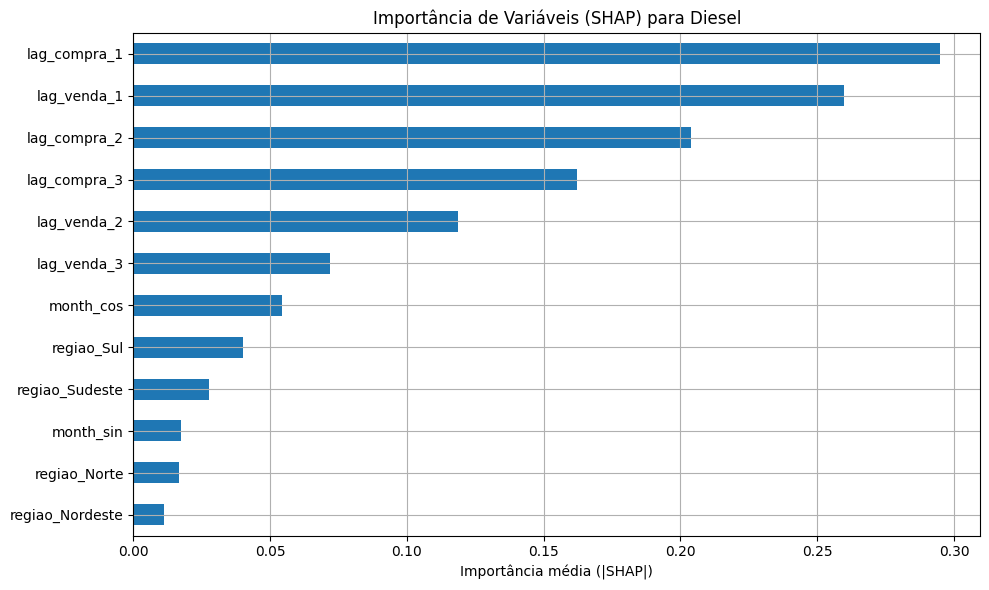

In [28]:
# Ensure proper sorting
df = data.query('produto=="Diesel"').sort_values(['produto', 'data'])

# Create lagged features (you can add more lags if needed)
for lag in [1, 2, 3]:
    df[f'lag_venda_{lag}'] = df.groupby('produto')['avg_preco_venda'].shift(lag)
    df[f'lag_compra_{lag}'] = df.groupby('produto')['avg_preco_compra'].shift(lag)

# Subset com variáveis necessárias
features = ['regiao', 'produto', 'month_sin', 'month_cos'] + [col for col in df.columns if col.startswith('lag_')]
target = 'avg_preco_venda'

# One-hot encode regiao e produto
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df[target]

# Treinamento e avaliação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Importância de features (LightGBM)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("📊 Top 10 variáveis mais importantes:")
display(importances.head(10))

# Use TreeExplainer diretamente
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Se você tiver uma task de regressão, shap_values será um array [n amostras, n features]
import numpy as np
shap_mean = np.abs(shap_values).mean(axis=0)
shap_importance = pd.Series(shap_mean, index=X_test.columns).sort_values(ascending=False)

# Exibir principais variáveis
shap_importance.head(15).plot(kind='barh', figsize=(10, 6), title='Importância de Variáveis (SHAP) para Diesel')
plt.gca().invert_yaxis()
plt.xlabel("Importância média (|SHAP|)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Conclusions of Trends
- All fuels follow a behavior that is strongly dependent on price history (lags)
- Neither seasonality nor region have a significant influence
- month_sin/cos and region_* can be safely removed
- Creating product-specific models with lags + spreads is the most effective strategy

In [29]:
data.drop(columns=['month','month_num','month_sin','month_cos','regiao'], inplace=True)

## What is `bandeira_revenda_cat`?

In [30]:
data.columns

Index(['bandeira_revenda_cat', 'sigla_uf', 'id_municipio', 'produto',
       'n_estabelecimentos', 'avg_preco_compra', 'avg_preco_venda', 'data',
       'winsor_preco_compra', 'log_n_estabelecimentos',
       'faixa_estabelecimentos'],
      dtype='object')

- **Blue Label:** Stations affiliated with major national brands (e.g., Petrobras, Shell, Ipiranga) — strong brand identity

- **Green Label:** Stations affiliated with regional or smaller brands

- **Purple Label:** Stations affiliated with distributor cooperatives or specific niche groups

- **White Label:** Unbranded or "bandeira branca" stations — independent, no official branding

we do expect that **Blue/Green** often have higher prices, **White** tend to offer lower prices.

### We will analyze the Label distribution over state and also its correlation with price.

In [31]:
import plotly.express as px

# Desired label order
label_order = ["White Label", "Green Label", "Blue Label", "Purple Label"]

# Define color mapping (hex or names)
color_map = {
    "White Label": "gray",
    "Green Label": "green",
    "Blue Label": "blue",
    "Purple Label": "purple"
}

fig = px.box(
    data_frame=data,
    x="avg_preco_compra",
    color="bandeira_revenda_cat",
    category_orders={"bandeira_revenda_cat": label_order},
    color_discrete_map=color_map,
    title="Boxplot of Average Purchase Price by Fuel Station Label"
)

fig.show()


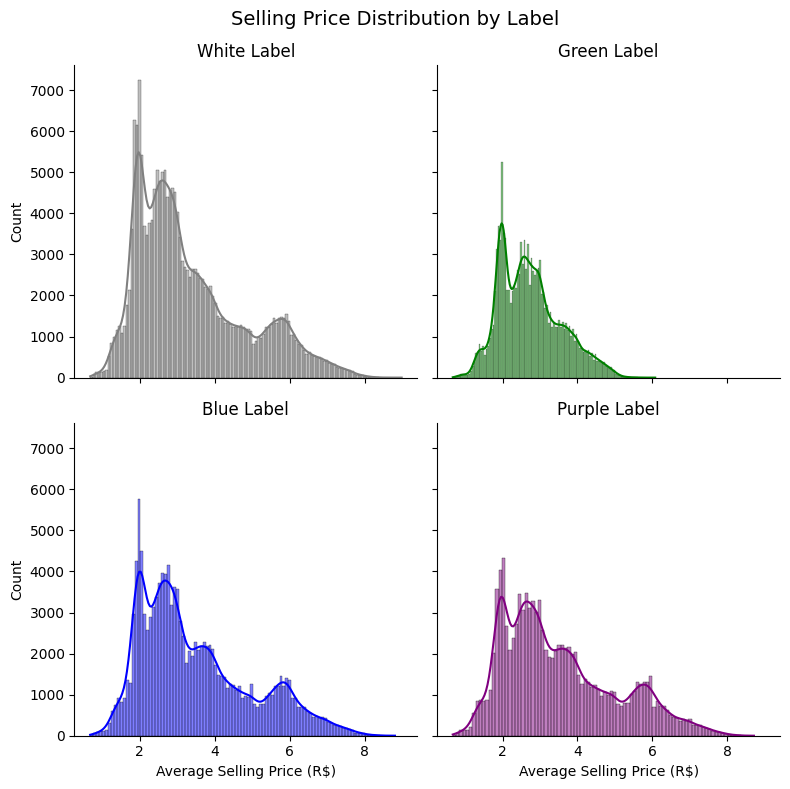

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette for each label
label_colors = {
    "White Label": "gray",
    "Green Label": "green",
    "Blue Label": "blue",
    "Purple Label": "purple"
}

# Set order and style
order = ["White Label", "Green Label", "Blue Label", "Purple Label"]

# Filter only valid labels (optional, to avoid errors)
data_filtered = data[data['bandeira_revenda_cat'].isin(order)]

# Create grid
g = sns.FacetGrid(
    data_filtered,
    col="bandeira_revenda_cat",
    col_order=order,
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True
)

# Map histogram + KDE manually per facet
for ax, label in zip(g.axes.flat, order):
    sns.histplot(
        data=data_filtered[data_filtered['bandeira_revenda_cat'] == label],
        x="avg_preco_venda",
        kde=True,
        ax=ax,
        color=label_colors[label]
    )
    ax.set_title(label)

# Axis + layout settings
g.set_axis_labels("Average Selling Price (R$)", "Count")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Selling Price Distribution by Label", fontsize=14)
plt.tight_layout()
plt.show()


### Interpretation:
- **Green Label**
    - Narrow and concentrated distribution
    - Few outliers
    - Reflects standardization of prices in regional networks with tight control
- **White Label**
    - Greater dispersion
    - Several peaks → multiple pricing strategies
    - May include stations with aggressive practices or high margins
- **Blue Label**
    - Slightly more expensive than Green
    - More dispersion than Green, but less than White
    - Represents large chains such as Shell, BR, Ipiranga
- **Purple Label**
    - Similar distribution to Blue
    - Also with a long tail → some very high prices

### Conclusions
White Label → greater variability, heterogeneous behavior

Green Label → more standardized, more predictable behavior

Blue/Purple → more stable, but with higher price ranges

### Verifying the Statistical difference between Labels using ANOVA.

In [33]:
from scipy.stats import f_oneway

groups = [g["avg_preco_venda"].values for _, g in df.groupby("bandeira_revenda_cat")]
f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 3505.0403743476645
p-value: 0.0


The very high value of **F-statistic** means that the variation between group means is much grater than the variation within groups.

The p-value of 0.0 confirms the statiscally significancy. **Strong evidence that the `avg_preco_venda` differs by label.**

-> We do still need to verify how much of the variance is explained by the label, and if it is still relevant with product, lags.

In [34]:
import statsmodels.formula.api as smf

# Run OLS: C() treats label as categorical variable
model = smf.ols("avg_preco_venda ~ C(bandeira_revenda_cat)", data=df).fit()

# Show regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        avg_preco_venda   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3505.
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:20:06   Log-Likelihood:            -3.1625e+05
No. Observations:              175880   AIC:                         6.325e+05
Df Residuals:                  175876   BIC:                         6.325e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor
import pandas as pd

# Select features for prediction
features = ['bandeira_revenda_cat', 'produto', 'lag_venda_1', 'lag_compra_1', 'lag_venda_2', 'lag_compra_2']
target = 'avg_preco_venda'

# Drop rows with missing values
df_model = df.dropna(subset=features + [target])

# One-hot encode categorical features
cat_features = ['bandeira_revenda_cat', 'produto']
df_encoded = pd.get_dummies(df_model[features], columns=cat_features, drop_first=False)

X = df_encoded
y = df_model[target]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 140702, number of used features: 8
[LightGBM] [Info] Start training from score 2.498844


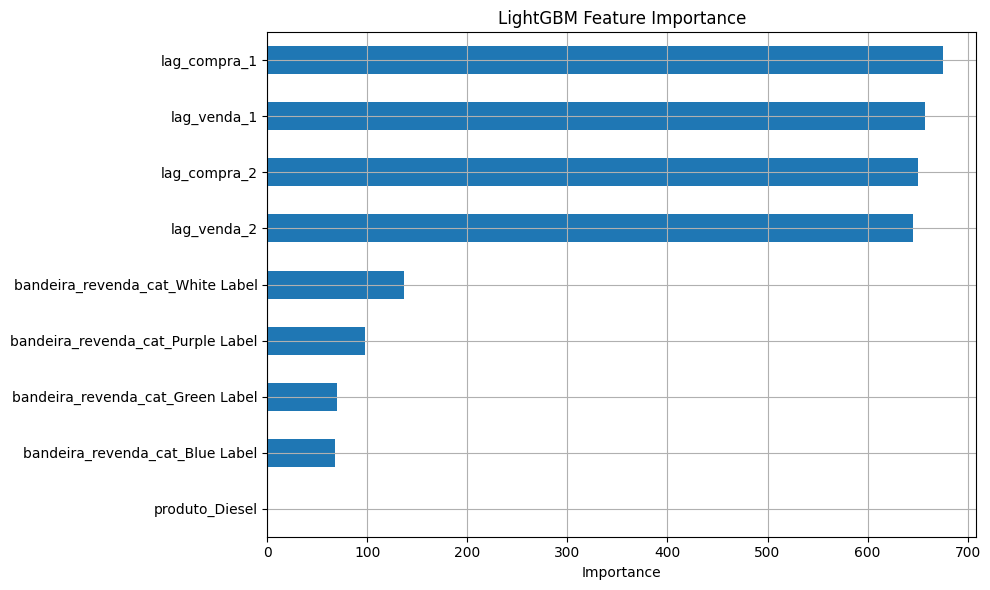

In [36]:
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusion of `bandeira_revenda_cat`
It contributs a little, more to know if it is White label (the others are approx. the same).

-> We will keep this variable to increase the preicison of the predictions, but maybe it is a good idea to change it to 'white' and 'blue/green/purple'.

In [37]:
data.columns

Index(['bandeira_revenda_cat', 'sigla_uf', 'id_municipio', 'produto',
       'n_estabelecimentos', 'avg_preco_compra', 'avg_preco_venda', 'data',
       'winsor_preco_compra', 'log_n_estabelecimentos',
       'faixa_estabelecimentos'],
      dtype='object')

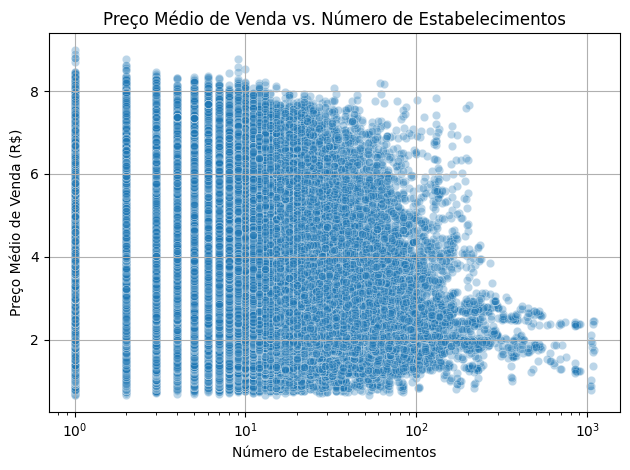

In [38]:
sns.scatterplot(data=data, x="n_estabelecimentos", y="avg_preco_venda", alpha=0.3)
plt.xscale("log")  # Optional, to compress extreme values
plt.title("Preço Médio de Venda vs. Número de Estabelecimentos")
plt.xlabel("Número de Estabelecimentos")
plt.ylabel("Preço Médio de Venda (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ewotjul\AppData\Local\Temp\ipykernel_44248\4280439079.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




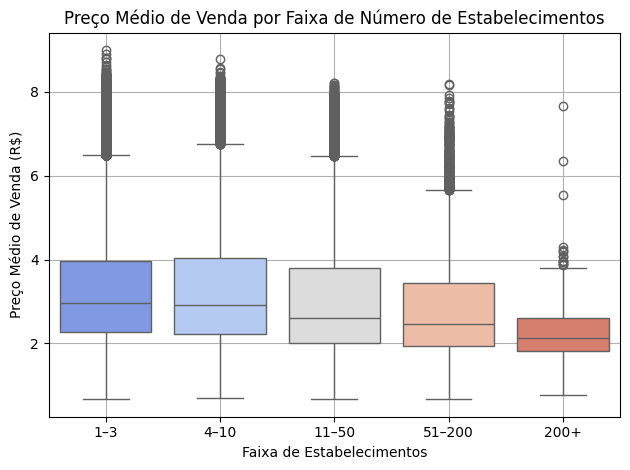

In [39]:
# Group and plot average price
sns.boxplot(data=data, x="faixa_estabelecimentos", y="avg_preco_venda", palette="coolwarm")
plt.title("Preço Médio de Venda por Faixa de Número de Estabelecimentos")
plt.xlabel("Faixa de Estabelecimentos")
plt.ylabel("Preço Médio de Venda (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()

It makes sense that a high competition reduces the price.

In [40]:
df_uf = data.groupby("sigla_uf")["n_estabelecimentos"].mean().reset_index()

import plotly.express as px

# Dicionário de código IBGE por estado para mapear (caso necessário)
uf_ibge_map = {
    "AC": 12, "AL": 27, "AP": 16, "AM": 13, "BA": 29, "CE": 23, "DF": 53, "ES": 32,
    "GO": 52, "MA": 21, "MT": 51, "MS": 50, "MG": 31, "PA": 15, "PB": 25, "PR": 41,
    "PE": 26, "PI": 22, "RJ": 33, "RN": 24, "RS": 43, "RO": 11, "RR": 14, "SC": 42,
    "SP": 35, "SE": 28, "TO": 17
}

df_uf["id_ibge"] = df_uf["sigla_uf"].map(uf_ibge_map)

fig = px.choropleth(
    df_uf,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations="sigla_uf",
    color="n_estabelecimentos",
    color_continuous_scale="YlOrRd",
    featureidkey="properties.sigla",
    scope="south america",
    title="Número Médio de Estabelecimentos por Estado"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()



### Finally, let's complete the analysis by including lags and seeing how the previous values affect the future values (autoregressor behaviour.)

In [41]:
def analyser(df):
    df_encoded = df.copy()
    cat_features = ['produto', 'sigla_uf', 'bandeira_revenda_cat', 'faixa_estabelecimentos']
    encoder = OrdinalEncoder()
    df_encoded[cat_features] = encoder.fit_transform(df_encoded[cat_features])

    # Now generate correlation matrix
    corr_matrix = df_encoded.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Mapa de Calor de Correlação entre Variáveis Numéricas")
    plt.tight_layout()
    plt.show()

    target_corr = corr_matrix['avg_preco_venda'].drop('avg_preco_venda')
    target_corr.sort_values(ascending=False).plot(kind='barh', figsize=(8, 6), title='Correlação com Preço Médio de Venda')
    plt.xlabel("Correlação")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Ensure proper sorting
    df = df.sort_values(['produto', 'data'])

    # Create lagged features (you can add more lags if needed)
    for lag in [1, 2, 3]:
        df[f'lag_venda_{lag}'] = df.groupby('produto')['avg_preco_venda'].shift(lag)
        df[f'lag_compra_{lag}'] = df.groupby('produto')['avg_preco_compra'].shift(lag)

    df_lagged = df.dropna(subset=[f'lag_venda_{i}' for i in [1, 2, 3]] + [f'lag_compra_{i}' for i in [1, 2, 3]])

    # Select relevant numeric features
    features = ['avg_preco_venda', 'avg_preco_compra'] + \
            [f'lag_venda_{i}' for i in [1, 2, 3]] + \
            [f'lag_compra_{i}' for i in [1, 2, 3]]

    corr_matrix = df_lagged[features].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Mapa de Correlação com Features Defasadas (Lags)")
    plt.tight_layout()
    plt.show()

    corr_with_target = corr_matrix['avg_preco_venda'].drop('avg_preco_venda')
    corr_with_target.sort_values().plot(kind='barh', figsize=(8, 6), title='Correlação com Preço Médio de Venda')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



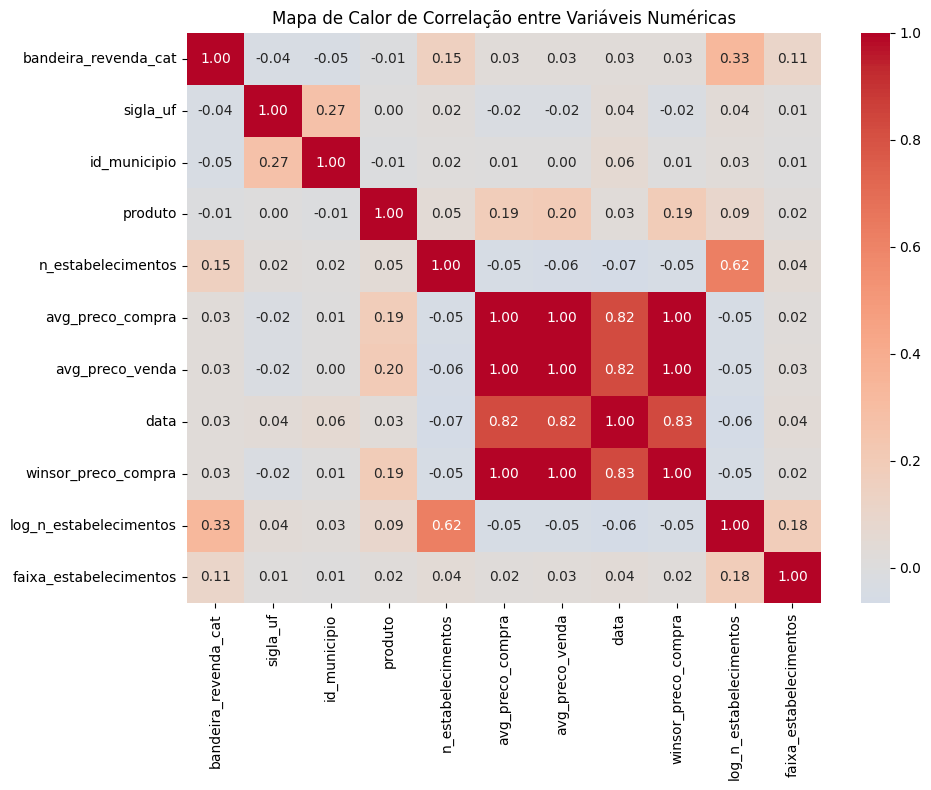

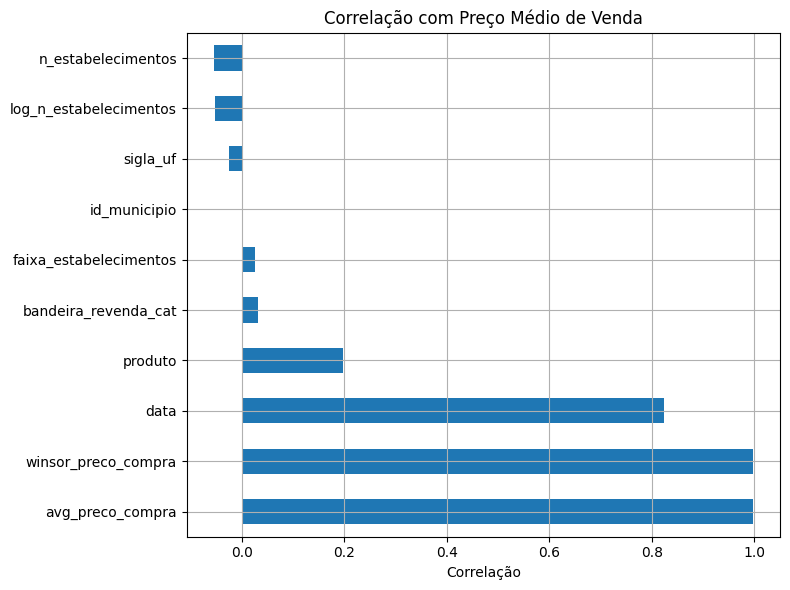

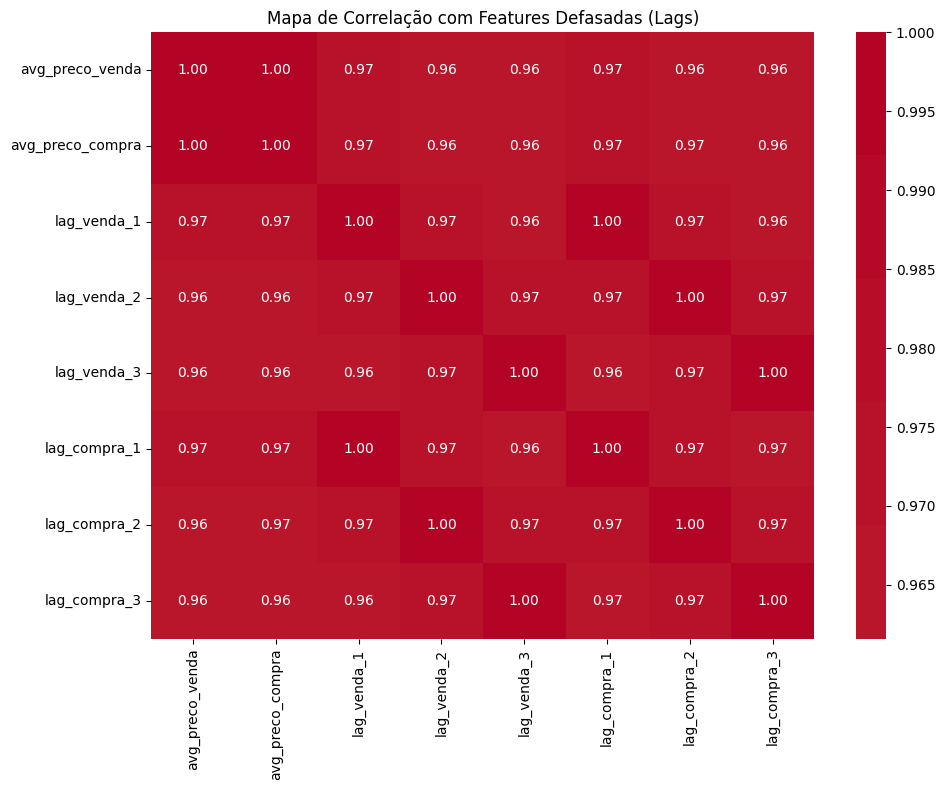

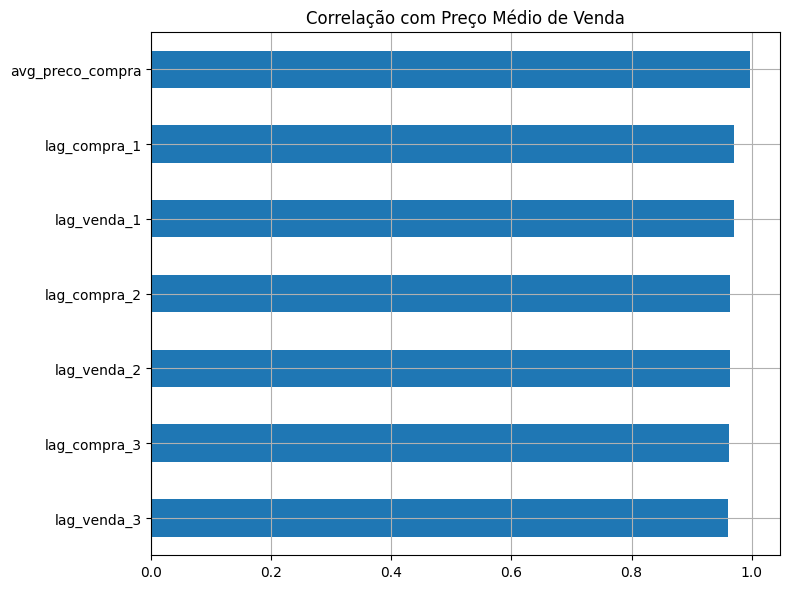

In [42]:
analyser(data)

The high correlation between `avg_preco_venda` and `lag_venda_1`/`lag_venda_2` → strong autoregressive behavior.

It implies that lag features are crucial, and that they carry most of the predictive power in a case of strong autoregression like that.

Let's also notice that the `produto` has a huge gain in comparision with the other not lagged features.

So let's analyze the same by product.

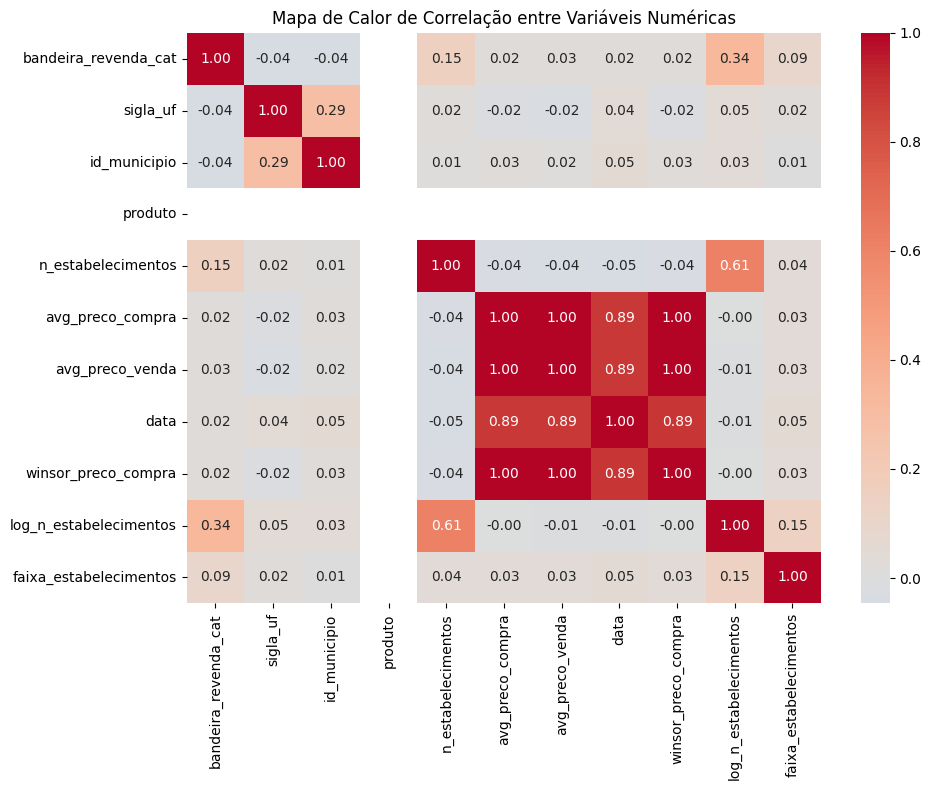

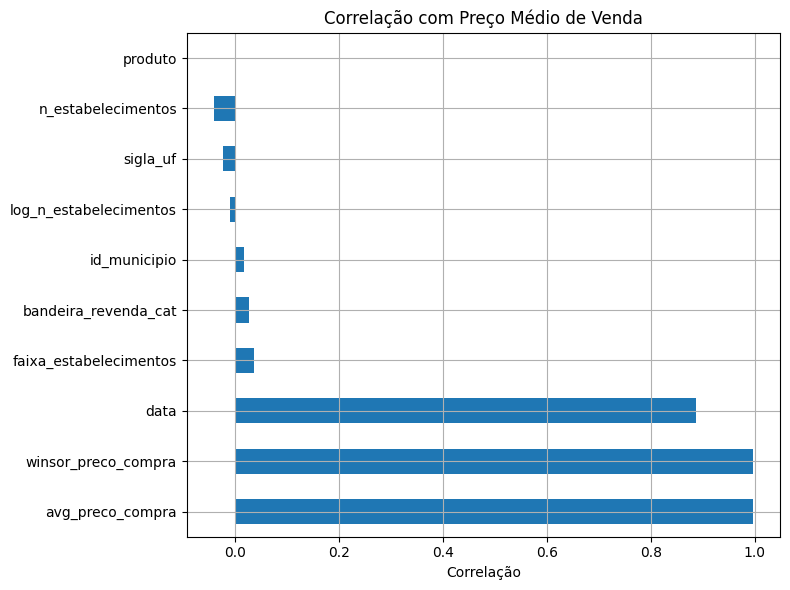

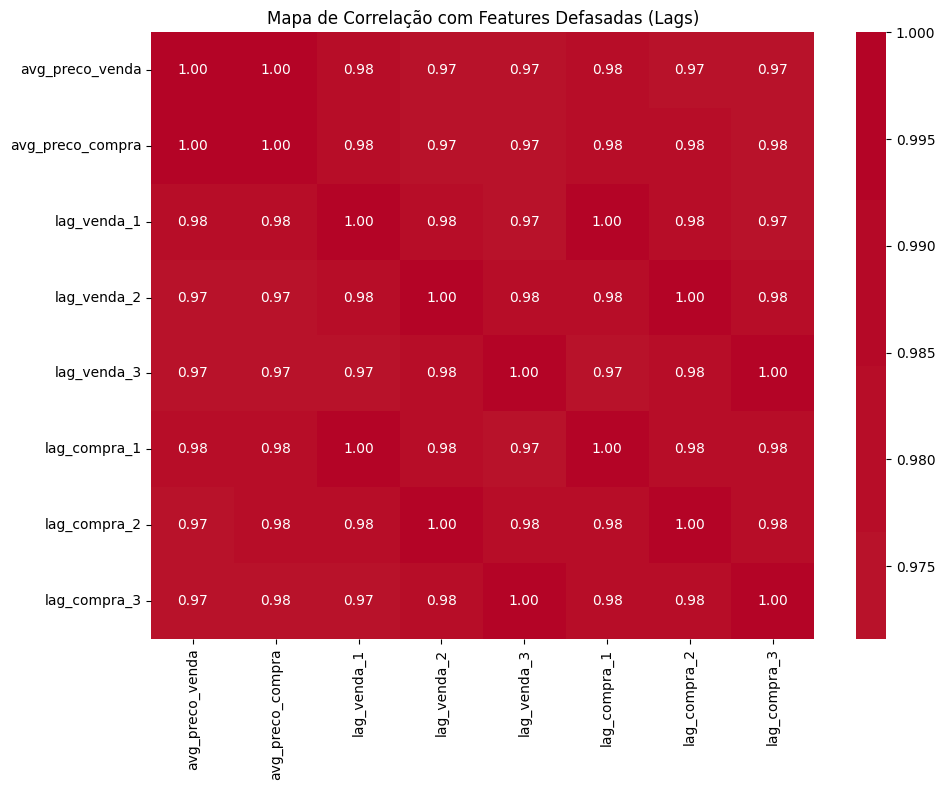

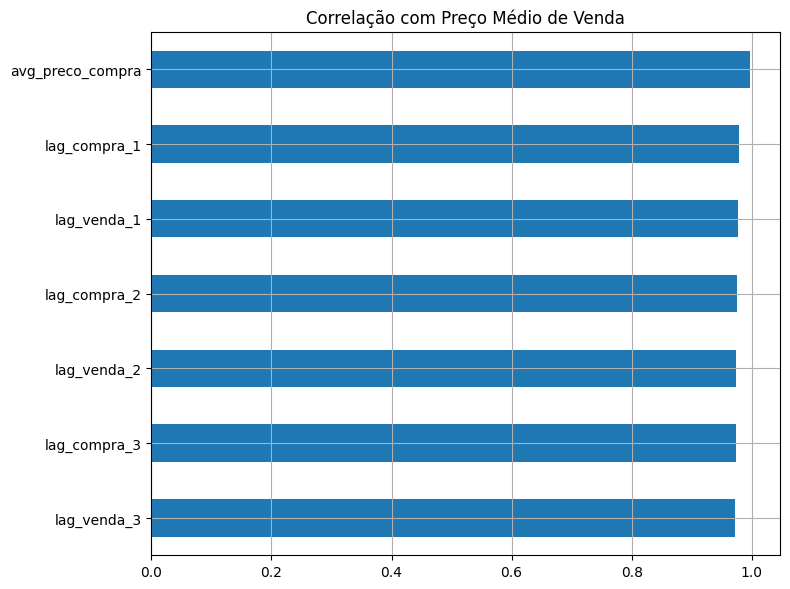

In [43]:
analyser(data.query('produto == "Gasolina"'))

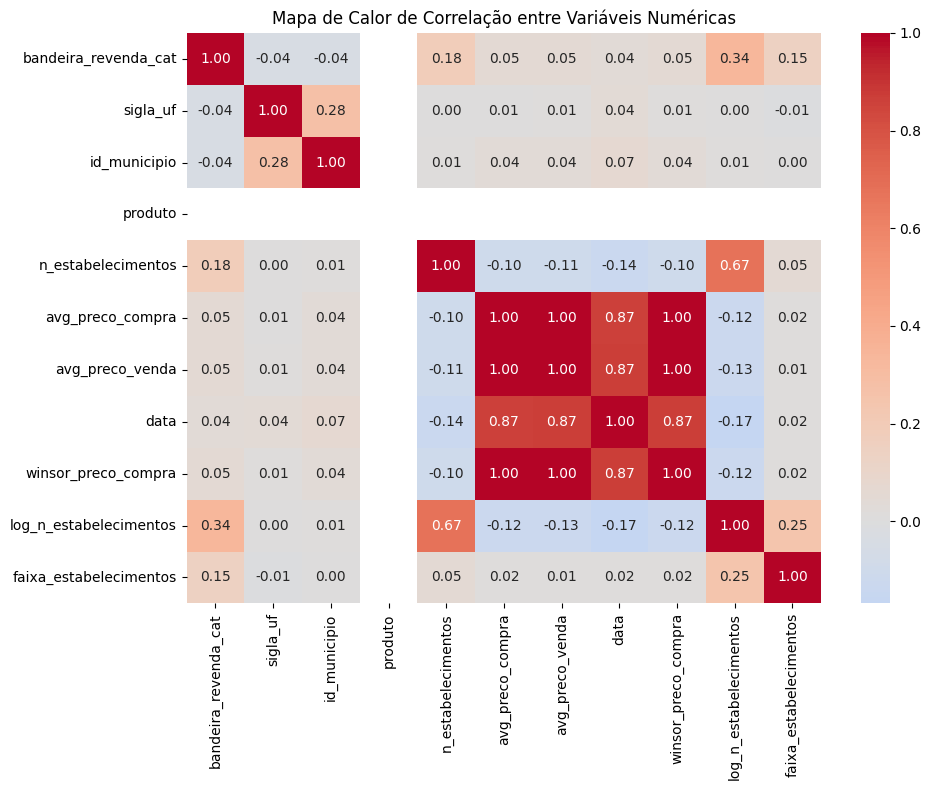

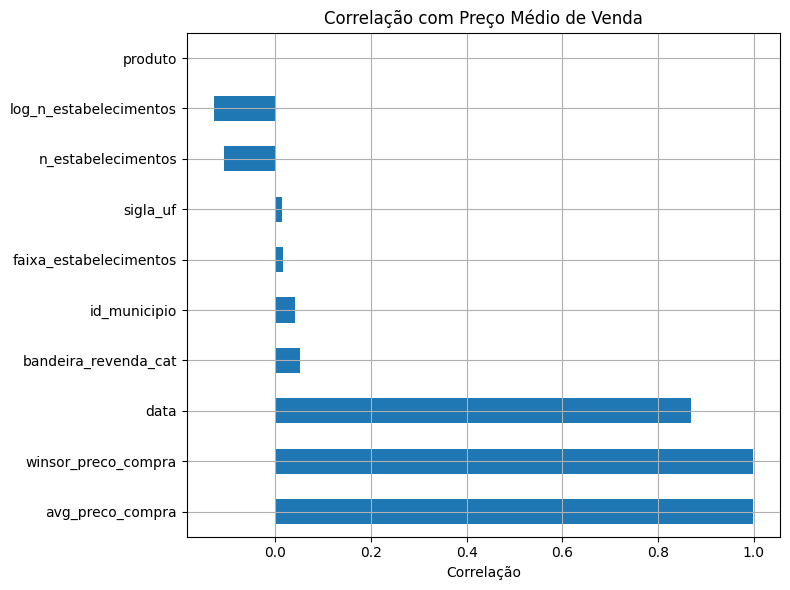

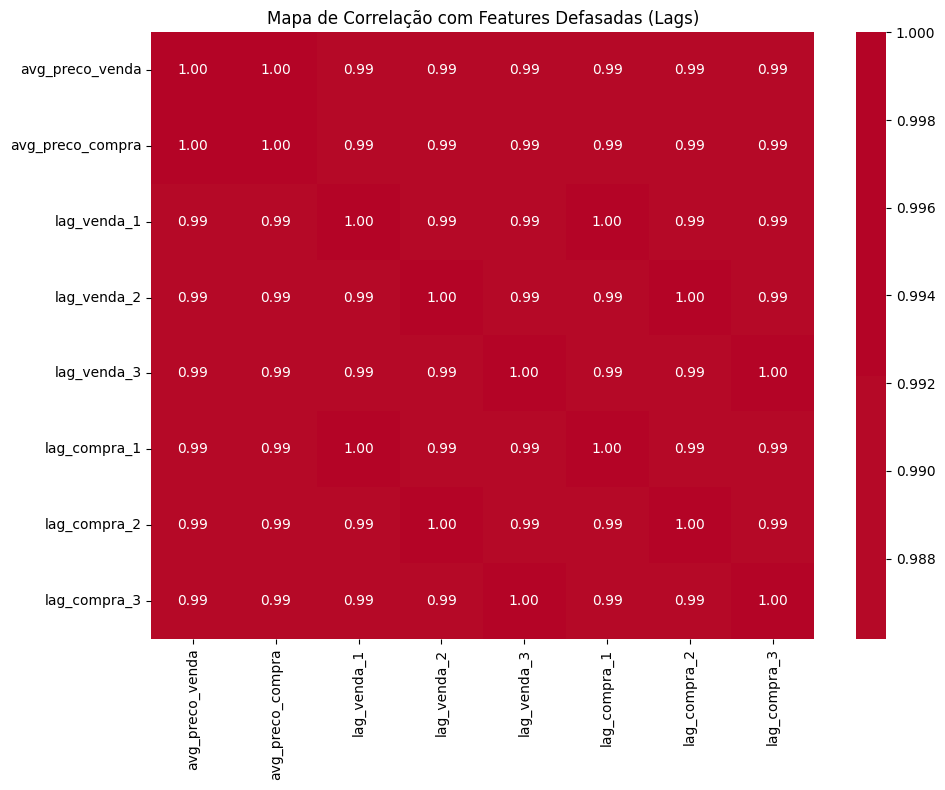

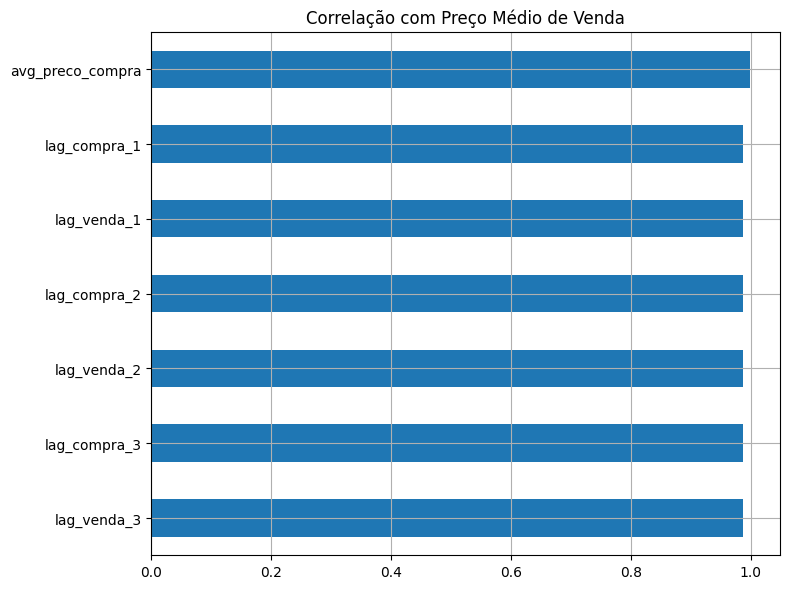

In [44]:
analyser(data.query('produto == "Diesel"'))

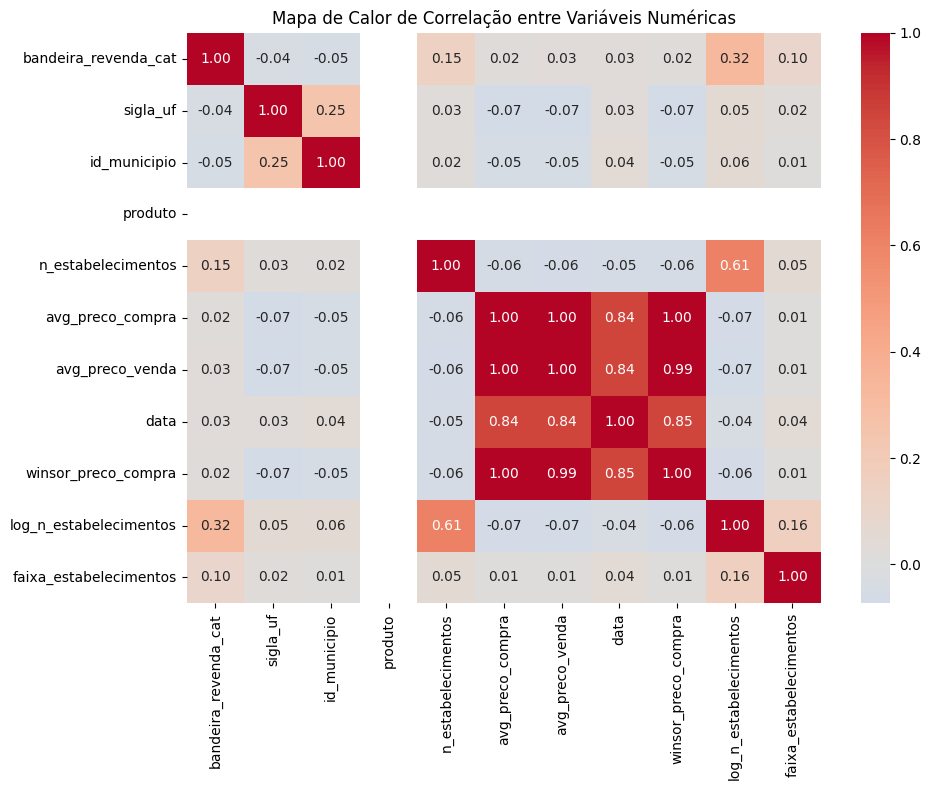

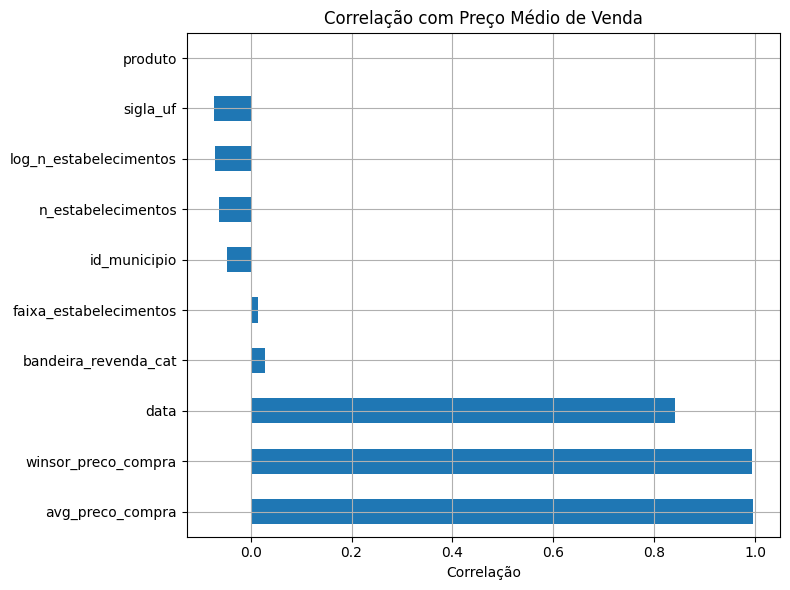

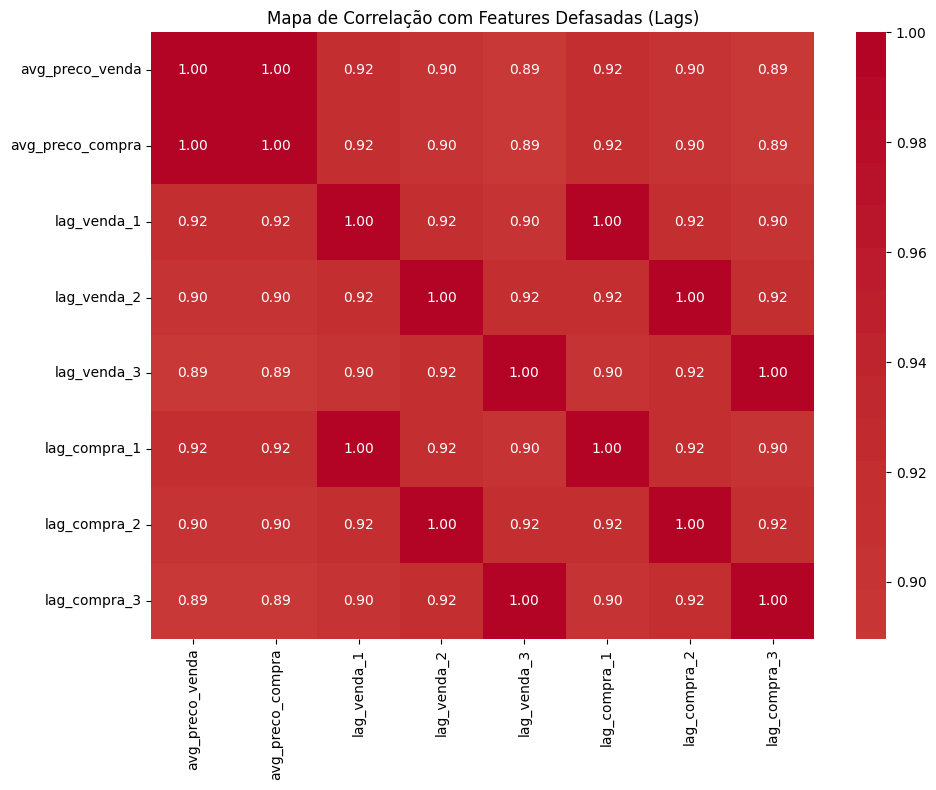

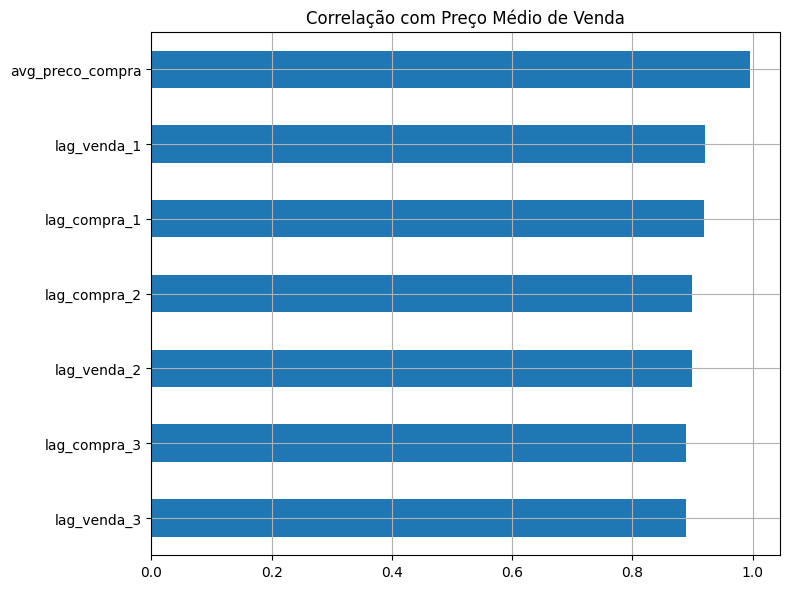

In [45]:
analyser(data.query('produto == "Etanol"'))

## Other features

In [46]:
# Convert 'data' to datetime if not already
data["data"] = pd.to_datetime(data["data"])

# Extract the month as a timestamp for grouping
data["month"] = data["data"].dt.to_period("M").dt.to_timestamp()

# Group by month and product to get std dev (volatility)
volatility_data = data.groupby(["month", "produto"])["avg_preco_venda"].std().reset_index()
volatility_data.rename(columns={"avg_preco_venda": "monthly_volatility"}, inplace=True)

# Optional: plot volatility
import plotly.express as px

fig = px.line(volatility_data, x="month", y="monthly_volatility", color="produto",
              title="Volatilidade Mensal do Preço por Produto")
fig.show()


In [47]:
data = data.merge(volatility_data, on=["month", "produto"], how="left")

In [48]:
# Price Spread
data["price_spread"] = data["avg_preco_venda"] - data["avg_preco_compra"]

In [49]:
#Rolling Averages & Volatility
# Example: 3-month rolling average and std per product
data_sorted = data.sort_values("data")
data["rolling_avg_venda_3m"] = data.groupby("produto")["avg_preco_venda"].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

data["rolling_std_venda_3m"] = data.groupby("produto")["avg_preco_venda"].transform(
    lambda x: x.rolling(window=3, min_periods=1).std()
)


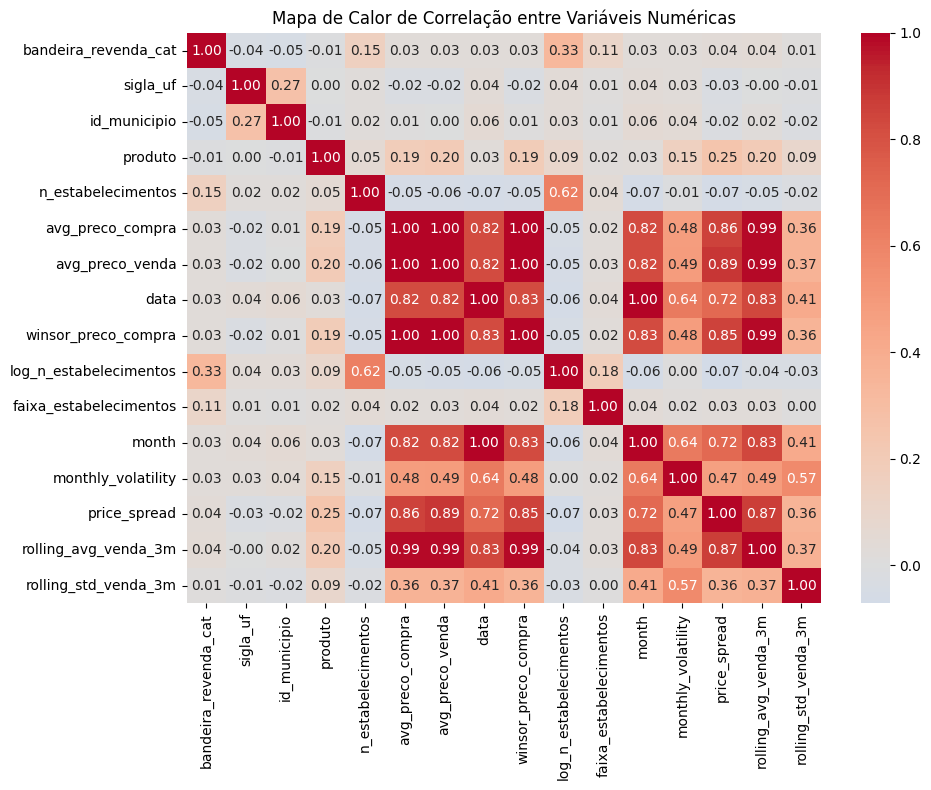

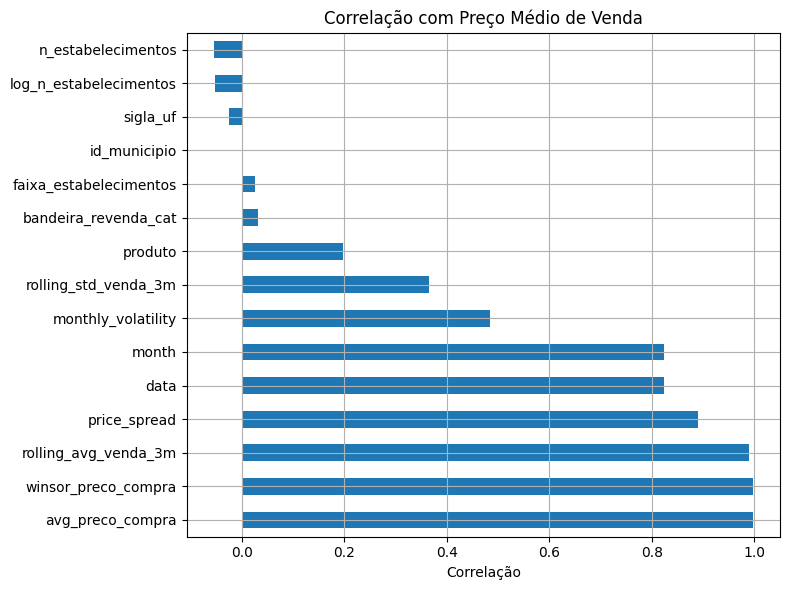

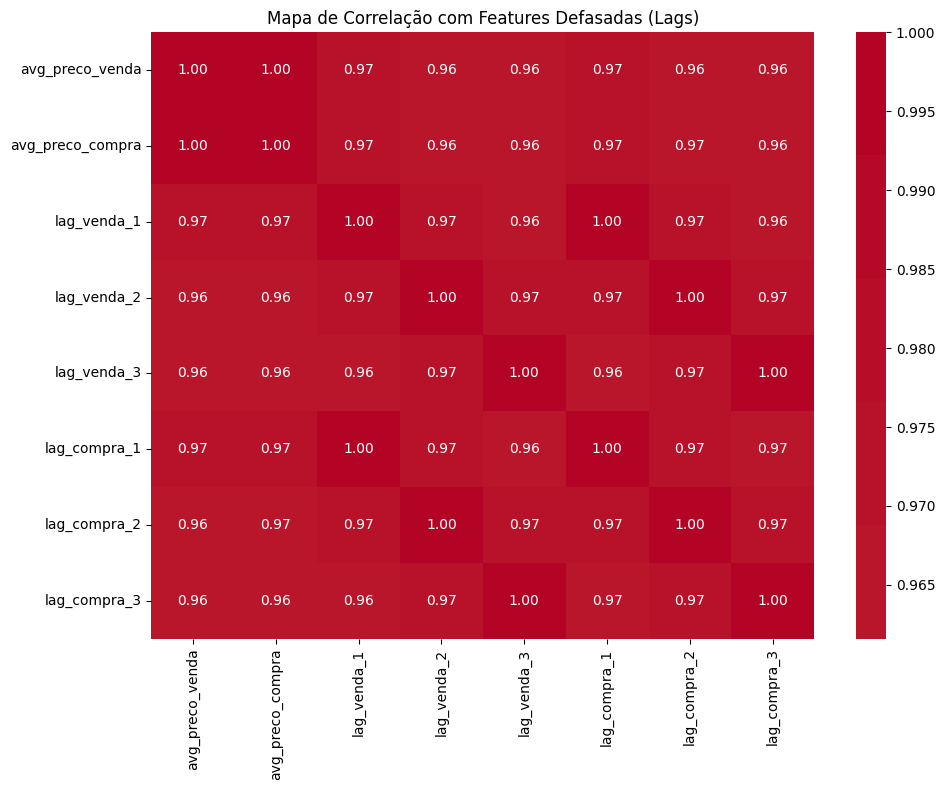

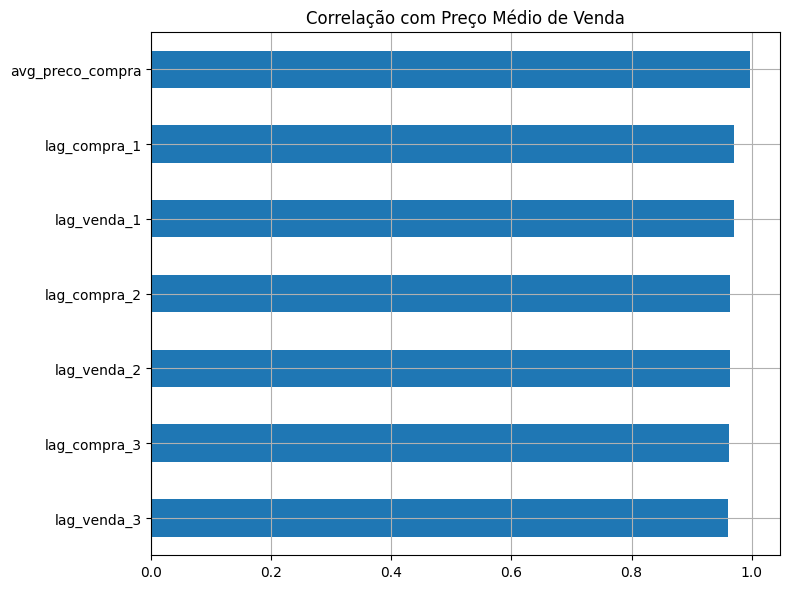

In [50]:
analyser(data)

In [51]:
data.columns

Index(['bandeira_revenda_cat', 'sigla_uf', 'id_municipio', 'produto',
       'n_estabelecimentos', 'avg_preco_compra', 'avg_preco_venda', 'data',
       'winsor_preco_compra', 'log_n_estabelecimentos',
       'faixa_estabelecimentos', 'month', 'monthly_volatility', 'price_spread',
       'rolling_avg_venda_3m', 'rolling_std_venda_3m'],
      dtype='object')

In [52]:
data = data.dropna()
data.to_parquet("./../data/02_silver/oil_and_gas_dataset-candidate-features.parquet", index=False)